In [2]:
import pandas as pd

games = pd.read_csv(r"C:\Users\User\PycharmProjects\PythonProject\games_processed_final_with_records.csv")

In [3]:
accuracy = 0
total_games = 0
correct_predictions = 0

def predict_row(row, home_advtg):
    global total_games
    global correct_predictions
    date = row['game_date']
    total_games += 1
    home_total_games = row['record_home_wins'] + row['record_home_losses'] - 1
    away_total_games = row['record_away_wins'] + row['record_away_losses'] - 1
    wins_home = row['record_home_wins']
    wins_away = row['record_away_wins']
    if row['wl_home'] == 'W':
        wins_home -= 1
    else :
        wins_away -= 1
    home_win_pct = 0
    away_win_pct = 0
    if home_total_games == 0 and away_total_games == 0:
        if row['wl_home'] == 'W':
            correct_predictions += 1
    else :
        if home_total_games == 0:
            home_win_pct = 0.5 + home_advtg
        else : home_win_pct = float(wins_home)/float(home_total_games)
        if away_total_games == 0:
            away_win_pct = 0.5
        else : away_win_pct = float(wins_away)/float(away_total_games)
        if home_win_pct + home_advtg >= away_win_pct and row['wl_home'] == 'W':
            correct_predictions += 1
        elif away_win_pct > home_win_pct + home_advtg and row['wl_home'] == 'L':
            correct_predictions += 1

In [8]:
import numpy as np

home_adv_values = np.linspace(0, 0.3, num=31)
for home_adv_tune in home_adv_values:
    games.apply(lambda row : predict_row(row, home_adv_tune), axis=1)
    print(home_adv_tune)
    print(total_games)
    print(correct_predictions)
    total_games = 0
    correct_predictions = 0

0.0
70511
44705
0.01
70511
44959
0.02
70511
45211
0.03
70511
45508
0.04
70511
45768
0.05
70511
45979
0.06
70511
46160
0.07
70511
46380
0.08
70511
46562
0.09
70511
46725
0.1
70511
46808
0.11
70511
46882
0.12
70511
46924
0.13
70511
46995
0.14
70511
46977
0.15
70511
47009
0.16
70511
46990
0.17
70511
47020
0.18
70511
46956
0.19
70511
46886
0.2
70511
46860
0.21
70511
46861
0.22
70511
46817
0.23
70511
46745
0.24
70511
46658
0.25
70511
46601
0.26
70511
46553
0.27
70511
46463
0.28
70511
46309
0.29
70511
46143
0.3
70511
46013


In [9]:
import numpy as np

home_adv_values = np.linspace(0.3, 0.4, num=11)
for home_adv_tune in home_adv_values:
    games.apply(lambda row : predict_row(row, home_adv_tune), axis=1)
    print(home_adv_tune)
    print(total_games)
    print(correct_predictions)
    print(float(correct_predictions)/float(total_games))
    total_games = 0
    correct_predictions = 0

0.3
70511
46013
0.6525648480378948
0.31
70511
45871
0.6505509778616102
0.32
70511
45786
0.6493454921927075
0.33
70511
45687
0.6479414559430443
0.34
70511
45607
0.6468068811958417
0.35
70511
45474
0.6449206506786175
0.36
70511
45388
0.6437009828253748
0.37
70511
45303
0.642495497156472
0.38
70511
45172
0.6406376310079278
0.39
70511
45059
0.6390350441775042
0.4
70511
44969
0.6377586475869014


In [10]:
import numpy as np

home_adv_values = np.linspace(0.41, 0.45, num=5)
for home_adv_tune in home_adv_values:
    games.apply(lambda row : predict_row(row, home_adv_tune), axis=1)
    print(home_adv_tune)
    print(total_games)
    print(correct_predictions)
    print(float(correct_predictions)/float(total_games))
    total_games = 0
    correct_predictions = 0

0.41
70511
44887
0.6365957084710187
0.42
70511
44815
0.6355745911985364
0.43
70511
44696
0.6338869112620726
0.44
70511
44637
0.6330501623860106
0.45
70511
44533
0.6315752152146473


In [12]:
import numpy as np

home_adv_values = np.linspace(0.13, 0.18, num=21)
accuracies = {home_adv_value : 0 for home_adv_value in home_adv_values}
for home_adv_tune in home_adv_values:
    games.apply(lambda row : predict_row(row, home_adv_tune), axis=1)
    print(home_adv_tune)
    print(correct_predictions)
    accuracies[home_adv_tune] = float(correct_predictions)/float(total_games)
    print(accuracies[home_adv_tune])
    total_games = 0
    correct_predictions = 0

0.13
46995
0.6664917530598062
0.1325
46984
0.6663357490320659
0.135
46960
0.6659953766079052
0.1375
46961
0.6660095587922452
0.14
46977
0.6662364737416857
0.14250000000000002
46985
0.666349931216406
0.145
46985
0.666349931216406
0.1475
46997
0.6665201174284864
0.15
47009
0.6666903036405667
0.1525
46975
0.6662081093730057
0.155
46982
0.6663073846633859
0.1575
46986
0.666364113400746
0.16
46990
0.6664208421381062
0.1625
46993
0.6664633886911262
0.165
47001
0.6665768461658464
0.16749999999999998
47031
0.6670023116960474
0.16999999999999998
47020
0.6668463076683071
0.1725
47040
0.6671299513551077
0.175
47006
0.6666477570875466
0.1775
46982
0.6663073846633859
0.18
46956
0.665938647870545


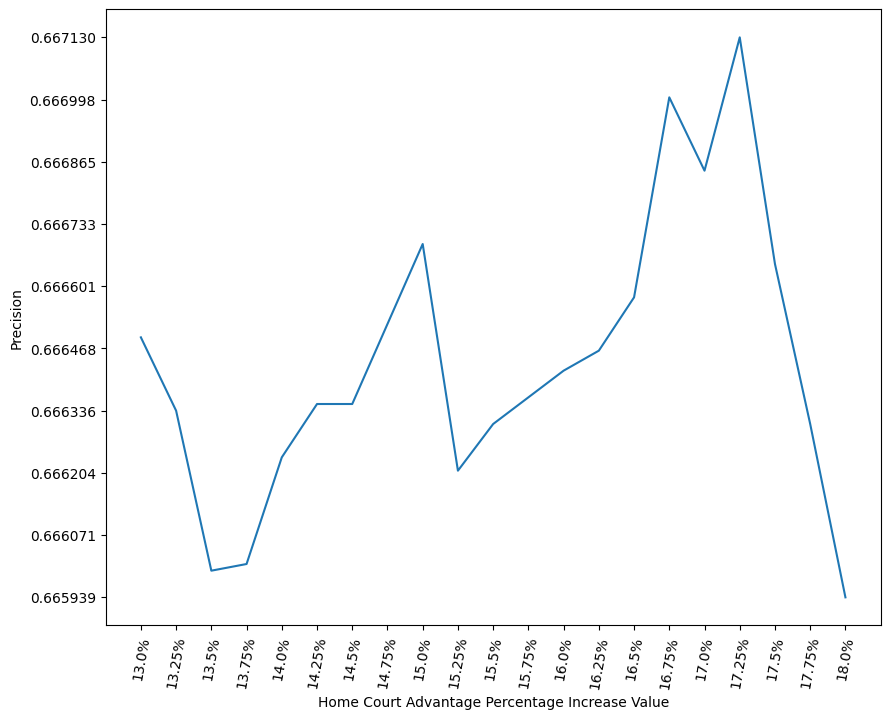

In [89]:
import matplotlib.pyplot as plt

lists = sorted(accuracies.items())

home_advtgs, accuracies_values = zip(*lists)
home_advtgs_scaled = []
for pct in home_advtgs:
    home_advtgs_scaled.append(str(round(pct*100,2))+"%")
home_advtgs = home_advtgs_scaled
plt.figure(figsize=(10,8))
plt.plot(home_advtgs, accuracies_values)
plt.xticks(home_advtgs, rotation=80)
plt.yticks(np.linspace(0.665939, 0.667130, 10))
plt.xlabel("Home Court Advantage Percentage Increase Value")
plt.ylabel("Precision")
plt.savefig(r"C:\Users\User\PycharmProjects\PythonProject\best_home_court_advtg_graphs.png")
plt.show()

In [32]:
# Now let's test each value on 5 random 5000-game samples to see which parameter is the best

samples = []
for i in list(range(1,6)):
    samples.append(games.sample(n=5000, replace=False))

In [33]:
sample_accuracies = []
for home_adv_tune in home_adv_values:
    sample_accuracy = []
    for sample in samples:
        sample.apply(lambda row : predict_row(row, home_adv_tune), axis=1)
        sample_accuracy.append(float(correct_predictions)/float(total_games))
        total_games = 0
        correct_predictions = 0
    sample_accuracy = np.array(sample_accuracy)
    sample_accuracies.append(sample_accuracy)
    print(str(home_adv_tune) + " : " + str(sample_accuracy.mean()))

# The difference is so minuscule that is doesn't really matter. I'll just take 0.1725

0.13 : 0.6659200000000001
0.1325 : 0.66632
0.135 : 0.6656000000000001
0.1375 : 0.66528
0.14 : 0.66536
0.14250000000000002 : 0.66528
0.145 : 0.666
0.1475 : 0.66656
0.15 : 0.6668000000000001
0.1525 : 0.6666399999999999
0.155 : 0.66688
0.1575 : 0.66672
0.16 : 0.6669600000000001
0.1625 : 0.6668399999999999
0.165 : 0.6672
0.16749999999999998 : 0.6680400000000001
0.16999999999999998 : 0.66764
0.1725 : 0.66832
0.175 : 0.6675600000000002
0.1775 : 0.6672399999999999
0.18 : 0.6665199999999999


In [59]:
teams = games['team_name_home'].unique()
team_elos = {team : 0 for team in teams}
team_elos

{'Toronto Huskies': 0,
 'St. Louis Bombers': 0,
 'Providence Steamrollers': 0,
 'Chicago Stags': 0,
 'Detroit Falcons': 0,
 'Cleveland Rebels': 0,
 'Pittsburgh Ironmen': 0,
 'Boston Celtics': 0,
 'Golden State Warriors': 0,
 'New York Knicks': 0,
 'Washington Capitols': 0,
 'Baltimore Bullets': 0,
 'Indianapolis Jets': 0,
 'Detroit Pistons': 0,
 'Sacramento Kings': 0,
 'Los Angeles Lakers': 0,
 'Atlanta Hawks': 0,
 'Indianapolis Olympians': 0,
 'Waterloo Hawks': 0,
 'Anderson Packers': 0,
 'Sheboygan Red Skins': 0,
 'Philadelphia 76ers': 0,
 'Denver Nuggets OLD': 0,
 'Washington Wizards': 0,
 'Chicago Bulls': 0,
 'Houston Rockets': 0,
 'Oklahoma City Thunder': 0,
 'Milwaukee Bucks': 0,
 'Phoenix Suns': 0,
 'Los Angeles Clippers': 0,
 'Portland Trail Blazers': 0,
 'Cleveland Cavaliers': 0,
 'Utah Jazz': 0,
 'Indiana Pacers': 0,
 'Denver Nuggets': 0,
 'Brooklyn Nets': 0,
 'San Antonio Spurs': 0,
 'Dallas Mavericks': 0,
 'New Orleans Pelicans': 0,
 'Miami Heat': 0,
 'Orlando Magic': 0,
 '

In [60]:
# Now let's try to vary the K-factor in Elo calculation. Maybe I shouldn't increase K for playoff games...

def change_elo(team_1_elo, team_2_elo, first_score, is_reg_seas, K_reg, K_po):
    q_a = pow(10, team_1_elo/400)
    q_b = pow(10, team_2_elo/400)
    e_a = q_a/(q_a+q_b)
    if is_reg_seas:
        return team_1_elo + K_reg * (first_score - e_a), team_2_elo + K_reg * (e_a - first_score)
    else: return team_1_elo + K_po * (first_score - e_a), team_2_elo + K_po * (e_a - first_score)

In [61]:
import math

total_games_elo = 0
correct_predictions_elo = 0

def predict_row_elos(row):
    global total_games_elo
    global correct_predictions_elo
    date = row['game_date']
    home_team = row['team_name_home']
    away_team = row['team_name_away']
    home_elo = elos_shifted.loc[home_team, date]
    away_elo = elos_shifted.loc[away_team, date]
    total_games_elo += 1
    if math.isnan(home_elo):
        home_elo = 1200
    if math.isnan(away_elo):
        away_elo = 1200
    if home_elo >= away_elo and row['wl_home'] == 'W':
        correct_predictions_elo += 1
    elif away_elo > home_elo and row['wl_home'] == 'L':
        correct_predictions_elo += 1

In [62]:
def row_processing(row, K_reg, K_po):
    global team_elos
    global total_games_elo
    global correct_predictions_elo
    total_games_elo += 1
    home_team = row['team_name_home']
    away_team = row['team_name_away']
    home_elo = team_elos[home_team]
    away_elo = team_elos[away_team]
    is_reg = True
    if row['season_type'] == 'Playoffs':
        is_reg = False
    home_wl = 1
    if row['wl_home'] == 'L':
        home_wl = 0
    if home_elo >= away_elo and row['wl_home'] == 'W':
        correct_predictions_elo += 1
    elif away_elo > home_elo and row['wl_home'] == 'L':
        correct_predictions_elo += 1
    team_elos[home_team], team_elos[away_team] = change_elo(home_elo, away_elo, home_wl, is_reg, K_reg, K_po)

In [63]:
starting_elos = np.linspace(1000,1500,6)
K_factors_rs = np.linspace(10,40,7)
K_factors_po = np.linspace(10,40,7)
# Create meshgrid and reshape
X, Y, Z = np.meshgrid(starting_elos, K_factors_rs, K_factors_po)

# Stack the results into pairs
cartesian_product = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T

precision_dict = {tuple(triple) : 0 for triple in cartesian_product}

for starting_elo in starting_elos:
    for K_factor_rs in K_factors_rs:
        for K_factor_po in K_factors_po:
            team_elos = {team : starting_elo for team in teams}
            games.apply(lambda row : row_processing(row, K_factor_rs, K_factor_po), axis=1)
            precision = float(correct_predictions_elo)/float(total_games_elo) 
            print(str(starting_elo) + ", " + str(K_factor_rs) + ", " + str(K_factor_po) + ": " + str(correct_predictions_elo))
            correct_predictions_elo = 0
            total_games_elo = 0
            key = (starting_elo, K_factor_rs, K_factor_po)
            precision_dict[key] = precision

1000.0, 10.0, 10.0: 44697
1000.0, 10.0, 15.0: 44710
1000.0, 10.0, 20.0: 44681
1000.0, 10.0, 25.0: 44664
1000.0, 10.0, 30.0: 44623
1000.0, 10.0, 35.0: 44564
1000.0, 10.0, 40.0: 44528
1000.0, 15.0, 10.0: 45002
1000.0, 15.0, 15.0: 44995
1000.0, 15.0, 20.0: 44975
1000.0, 15.0, 25.0: 44946
1000.0, 15.0, 30.0: 44903
1000.0, 15.0, 35.0: 44903
1000.0, 15.0, 40.0: 44864
1000.0, 20.0, 10.0: 44983
1000.0, 20.0, 15.0: 44976
1000.0, 20.0, 20.0: 44985
1000.0, 20.0, 25.0: 44962
1000.0, 20.0, 30.0: 44939
1000.0, 20.0, 35.0: 44916
1000.0, 20.0, 40.0: 44879
1000.0, 25.0, 10.0: 44941
1000.0, 25.0, 15.0: 44953
1000.0, 25.0, 20.0: 44933
1000.0, 25.0, 25.0: 44921
1000.0, 25.0, 30.0: 44925
1000.0, 25.0, 35.0: 44940
1000.0, 25.0, 40.0: 44899
1000.0, 30.0, 10.0: 44790
1000.0, 30.0, 15.0: 44798
1000.0, 30.0, 20.0: 44804
1000.0, 30.0, 25.0: 44790
1000.0, 30.0, 30.0: 44780
1000.0, 30.0, 35.0: 44764
1000.0, 30.0, 40.0: 44740
1000.0, 35.0, 10.0: 44650
1000.0, 35.0, 15.0: 44635
1000.0, 35.0, 20.0: 44629
1000.0, 35.0

KeyboardInterrupt: 

In [71]:
#So the best performance is with K_rs = 15, K_po = 10.
#Now let's factor in home court advantage - anywhere between 10 and 150 Elo :)

def change_elo_hca_tuning(team_1_elo, team_2_elo, first_score, is_reg_seas, hca):
    team_1_elo_boosted = team_1_elo + hca
    q_a = pow(10, team_1_elo_boosted/400)
    q_b = pow(10, team_2_elo/400)
    e_a = q_a/(q_a+q_b)
    if is_reg_seas:
        return team_1_elo + 15 * (first_score - e_a), team_2_elo + 15 * (e_a - first_score)
    else: return team_1_elo + 10 * (first_score - e_a), team_2_elo + 10 * (e_a - first_score)

In [72]:
def row_processing_hca(row, hca):
    global team_elos
    global total_games_elo
    global correct_predictions_elo
    total_games_elo += 1
    home_team = row['team_name_home']
    away_team = row['team_name_away']
    home_elo = team_elos[home_team]
    away_elo = team_elos[away_team]
    is_reg = True
    if row['season_type'] == 'Playoffs':
        is_reg = False
    home_wl = 1
    if row['wl_home'] == 'L':
        home_wl = 0
    if home_elo + hca >= away_elo and row['wl_home'] == 'W':
        correct_predictions_elo += 1
    elif away_elo > home_elo + hca and row['wl_home'] == 'L':
        correct_predictions_elo += 1
    team_elos[home_team], team_elos[away_team] = change_elo_hca_tuning(home_elo, away_elo, home_wl, is_reg, hca)

In [73]:
hca_options = np.linspace(0,150,16)
correct_predictions_elo = 0
total_games_elo = 0
team_elos = {team : 1200 for team in teams}
precision_dict = {hca : 0 for hca in hca_options}
for hca in hca_options:
    games.apply(lambda row : row_processing_hca(row, hca), axis=1)
    precision = float(correct_predictions_elo)/float(total_games_elo) 
    print(str(hca) + ": " + str(correct_predictions_elo))
    correct_predictions_elo = 0
    total_games_elo = 0
    team_elos = {team : 1200 for team in teams}
    precision_dict[hca] = precision

0.0: 45002
10.0: 45540
20.0: 45979
30.0: 46351
40.0: 46618
50.0: 46905
60.0: 47033
70.0: 47182
80.0: 47350
90.0: 47492
100.0: 47500
110.0: 47527
120.0: 47506
130.0: 47437
140.0: 47378
150.0: 47273


In [74]:
hca_options = np.linspace(101,119,19)
correct_predictions_elo = 0
total_games_elo = 0
team_elos = {team : 1200 for team in teams}
precision_dict = {hca : 0 for hca in hca_options}
for hca in hca_options:
    games.apply(lambda row : row_processing_hca(row, hca), axis=1)
    precision = float(correct_predictions_elo)/float(total_games_elo) 
    print(str(hca) + ": " + str(correct_predictions_elo))
    correct_predictions_elo = 0
    total_games_elo = 0
    team_elos = {team : 1200 for team in teams}
    precision_dict[hca] = precision

101.0: 47494
102.0: 47512
103.0: 47484
104.0: 47486
105.0: 47492
106.0: 47507
107.0: 47511
108.0: 47523
109.0: 47513
110.0: 47527
111.0: 47525
112.0: 47515
113.0: 47532
114.0: 47550
115.0: 47542
116.0: 47528
117.0: 47515
118.0: 47502
119.0: 47502


In [76]:
precision_dict

{np.float64(101.0): 0.6735686630454822,
 np.float64(102.0): 0.6738239423636029,
 np.float64(103.0): 0.673426841202082,
 np.float64(104.0): 0.673455205570762,
 np.float64(105.0): 0.6735402986768022,
 np.float64(106.0): 0.6737530314419027,
 np.float64(107.0): 0.6738097601792629,
 np.float64(108.0): 0.6739799463913432,
 np.float64(109.0): 0.6738381245479429,
 np.float64(110.0): 0.6740366751287034,
 np.float64(111.0): 0.6740083107600232,
 np.float64(112.0): 0.6738664889166229,
 np.float64(113.0): 0.6741075860504034,
 np.float64(114.0): 0.6743628653685241,
 np.float64(115.0): 0.6742494078938038,
 np.float64(116.0): 0.6740508573130434,
 np.float64(117.0): 0.6738664889166229,
 np.float64(118.0): 0.6736821205202025,
 np.float64(119.0): 0.6736821205202025}

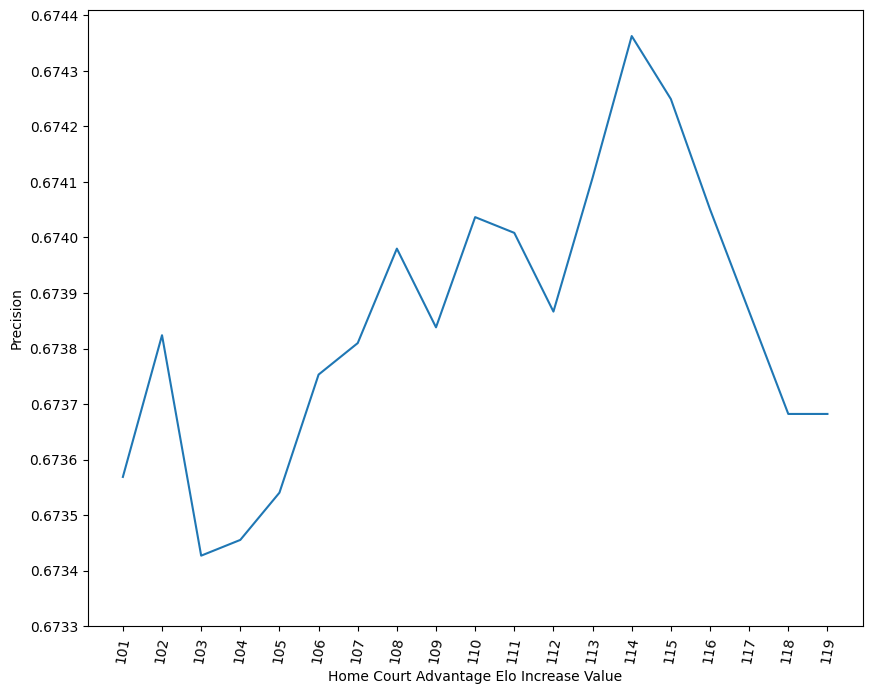

In [90]:
import matplotlib.pyplot as plt

lists = sorted(precision_dict.items())
home_advtgs, accuracies_values = zip(*lists)
plt.figure(figsize=(10,8))
plt.plot(home_advtgs, accuracies_values)
plt.xticks(home_advtgs, rotation=80)
plt.yticks(np.linspace(0.6733, 0.6744, 12))
plt.xlabel("Home Court Advantage Elo Increase Value")
plt.ylabel("Precision")
plt.savefig(r"C:\Users\User\PycharmProjects\PythonProject\best_home_court_advtg_graphs_elo.png")
plt.show()

In [91]:
# Now let's implement back-to-backs! First, let's convert the dates to dates. hca is fixed to 114

import datetime

games['game_date'] = pd.to_datetime(games['game_date'])

In [132]:
# True for home, False for away
previous_game_dates = {team : [datetime.datetime(1,1,1), True] for team in teams}

In [105]:
def change_elo_btb_tuning(team_1_elo, team_2_elo, first_score, is_reg_seas, btb_home_home, btb_home_away, btb_away_home, btb_away_away, btb_subtraction, btb_factor):
    team_1_elo_factored = team_1_elo + 114
    team_2_elo_factored = team_2_elo
    if btb_home_home:
        team_1_elo_factored -= btb_subtraction
    if btb_home_away:
        team_1_elo_factored -= btb_subtraction*btb_factor
    if btb_away_home:
        team_2_elo_factored -= btb_subtraction*btb_factor
    if btb_away_away:
        team_2_elo_factored -= btb_subtraction*btb_factor*btb_factor
    q_a = pow(10, team_1_elo_factored/400)
    q_b = pow(10, team_2_elo_factored/400)
    e_a = q_a/(q_a+q_b)
    if is_reg_seas:
        return team_1_elo + 15 * (first_score - e_a), team_2_elo + 15 * (e_a - first_score)
    else: return team_1_elo + 10 * (first_score - e_a), team_2_elo + 10 * (e_a - first_score)

In [106]:
def row_processing_btb(row, btb_sub, btb_factor):
    global team_elos
    global previous_game_dates
    global total_games_elo
    global correct_predictions_elo
    total_games_elo += 1
    home_team = row['team_name_home']
    away_team = row['team_name_away']
    home_elo = team_elos[home_team]
    away_elo = team_elos[away_team]
    date = row['game_date']
    btb_home_home = False
    btb_home_away = False
    btb_away_home = False
    btb_away_away = False
    home_previous_date = previous_game_dates[home_team]
    away_previous_date = previous_game_dates[away_team]
    home_elo_factored = home_elo + 114
    away_elo_factored = away_elo
    if home_previous_date == [date - datetime.timedelta(days=1), True]:
        btb_home_home = True
        home_elo_factored -= btb_sub
    elif home_previous_date == [date - datetime.timedelta(days=1), False]:
        btb_home_away = True
        home_elo_factored -= btb_sub*btb_factor
    elif away_previous_date == [date - datetime.timedelta(days=1), True]:
        btb_away_home = True
        away_elo_factored -= btb_sub*btb_factor
    elif away_previous_date == [date - datetime.timedelta(days=1), False]:
        btb_away_away = True
        away_elo_factored -= btb_sub*btb_factor*btb_factor
    is_reg = True
    if row['season_type'] == 'Playoffs':
        is_reg = False
    home_wl = 1
    if row['wl_home'] == 'L':
        home_wl = 0
    if home_elo_factored >= away_elo_factored and row['wl_home'] == 'W':
        correct_predictions_elo += 1
    elif away_elo_factored > home_elo_factored and row['wl_home'] == 'L':
        correct_predictions_elo += 1
    team_elos[home_team], team_elos[away_team] = change_elo_btb_tuning(home_elo, away_elo, home_wl, is_reg, btb_home_home, btb_home_away, btb_away_home, btb_away_away, btb_sub, btb_factor)
    previous_game_dates[home_team] = [date, True]
    previous_game_dates[away_team] = [date, False]

In [114]:
btb_options = np.linspace(18.5,19.5,11)
btb_factors = np.linspace(1, 1.1, 11)
correct_predictions_elo = 0
total_games_elo = 0
team_elos = {team : 1200 for team in teams}
# Create meshgrid and reshape
X, Y = np.meshgrid(btb_options, btb_factors)
# Stack the results into pairs
cartesian_product = np.vstack([X.ravel(), Y.ravel()]).T
precision_dict_btb = {tuple(pair) : 0 for pair in cartesian_product}

for option in btb_options:
    for factor in btb_factors:
        games.apply(lambda row : row_processing_btb(row, option, factor), axis=1)
        precision = float(correct_predictions_elo)/float(total_games_elo) 
        print(str(option) + ", " + str(factor) + ": " + str(correct_predictions_elo))
        correct_predictions_elo = 0
        total_games_elo = 0
        team_elos = {team : 1200 for team in teams}
        key = (option, factor)
        precision_dict_btb[key] = precision

18.5, 1.0: 47557
18.5, 1.01: 47554
18.5, 1.02: 47559
18.5, 1.03: 47562
18.5, 1.04: 47562
18.5, 1.05: 47560
18.5, 1.06: 47560
18.5, 1.07: 47567
18.5, 1.08: 47575
18.5, 1.09: 47573
18.5, 1.1: 47580
18.6, 1.0: 47554
18.6, 1.01: 47558
18.6, 1.02: 47562
18.6, 1.03: 47561
18.6, 1.04: 47556
18.6, 1.05: 47563
18.6, 1.06: 47563
18.6, 1.07: 47570
18.6, 1.08: 47574
18.6, 1.09: 47573
18.6, 1.1: 47579
18.7, 1.0: 47555
18.7, 1.01: 47557
18.7, 1.02: 47564
18.7, 1.03: 47561
18.7, 1.04: 47561
18.7, 1.05: 47562
18.7, 1.06: 47569
18.7, 1.07: 47572
18.7, 1.08: 47575
18.7, 1.09: 47577
18.7, 1.1: 47577
18.8, 1.0: 47557
18.8, 1.01: 47562
18.8, 1.02: 47565
18.8, 1.03: 47557
18.8, 1.04: 47563
18.8, 1.05: 47565
18.8, 1.06: 47570
18.8, 1.07: 47575
18.8, 1.08: 47574
18.8, 1.09: 47578
18.8, 1.1: 47575
18.9, 1.0: 47560
18.9, 1.01: 47566
18.9, 1.02: 47562
18.9, 1.03: 47561
18.9, 1.04: 47563
18.9, 1.05: 47568
18.9, 1.06: 47572
18.9, 1.07: 47575
18.9, 1.08: 47575
18.9, 1.09: 47579
18.9, 1.1: 47577
19.0, 1.0: 47563
19.

In [115]:
precision_dict_btb

{(np.float64(18.5), np.float64(1.0)): 0.6744621406589043,
 (np.float64(18.6), np.float64(1.0)): 0.6744195941058841,
 (np.float64(18.7), np.float64(1.0)): 0.6744337762902243,
 (np.float64(18.8), np.float64(1.0)): 0.6744621406589043,
 (np.float64(18.9), np.float64(1.0)): 0.6745046872119244,
 (np.float64(19.0), np.float64(1.0)): 0.6745472337649445,
 (np.float64(19.1), np.float64(1.0)): 0.6745330515806044,
 (np.float64(19.2), np.float64(1.0)): 0.6745472337649445,
 (np.float64(19.3), np.float64(1.0)): 0.6745330515806044,
 (np.float64(19.4), np.float64(1.0)): 0.6745330515806044,
 (np.float64(19.5), np.float64(1.0)): 0.6745472337649445,
 (np.float64(18.5), np.float64(1.01)): 0.6744195941058841,
 (np.float64(18.6), np.float64(1.01)): 0.6744763228432443,
 (np.float64(18.7), np.float64(1.01)): 0.6744621406589043,
 (np.float64(18.8), np.float64(1.01)): 0.6745330515806044,
 (np.float64(18.9), np.float64(1.01)): 0.6745897803179646,
 (np.float64(19.0), np.float64(1.01)): 0.6745472337649445,
 (np.flo

In [126]:
#So we set btb_sub=18.5, btb_factor=1.1, although it doesn't really matter. Remember that home-court adj.=114.

def change_elo_reinit(team_1_elo, team_2_elo, first_score, is_reg_seas, btb_hh, btb_ha, btb_ah, btb_aa):
    team_1_elo_factored = team_1_elo + 114
    team_2_elo_factored = team_2_elo
    if btb_hh:
        team_1_elo_factored -= 18.5
    if btb_ha:
        team_1_elo_factored -= 18.5*1.1
    if btb_ah:
        team_2_elo_factored -= 18.5*1.1
    if btb_aa:
        team_2_elo_factored -= 18.5*1.21
    q_a = pow(10, team_1_elo_factored/400)
    q_b = pow(10, team_2_elo_factored/400)
    e_a = q_a/(q_a+q_b)
    if is_reg_seas:
        return team_1_elo + 15 * (first_score - e_a), team_2_elo + 15 * (e_a - first_score)
    else: return team_1_elo + 10 * (first_score - e_a), team_2_elo + 10 * (e_a - first_score)

In [127]:
def row_processing_reinit(row, previous_row, reinit_factor):
    global team_elos
    global previous_game_dates
    global total_games_elo
    global correct_predictions_elo
    total_games_elo += 1
    home_team = row['team_name_home']
    away_team = row['team_name_away']
    date = row['game_date']
    previous_date = previous_row['game_date']
    if (date.month >= 10 and previous_date.month <= 9) or (date.year == 1999 and previous_date.year == 1998):
        for key in team_elos:
            team_elos[key] = reinit_factor*team_elos[key] + (1-reinit_factor)*1200
    home_elo = team_elos[home_team]
    away_elo = team_elos[away_team]
    btb_home_home = False
    btb_home_away = False
    btb_away_home = False
    btb_away_away = False
    home_previous_date = previous_game_dates[home_team]
    away_previous_date = previous_game_dates[away_team]
    home_elo_factored = home_elo + 114
    away_elo_factored = away_elo
    if home_previous_date == [date - datetime.timedelta(days=1), True]:
        btb_home_home = True
        home_elo_factored -= 18.5
    elif home_previous_date == [date - datetime.timedelta(days=1), False]:
        btb_home_away = True
        home_elo_factored -= 18.5*1.1
    elif away_previous_date == [date - datetime.timedelta(days=1), True]:
        btb_away_home = True
        away_elo_factored -= 18.5*1.1
    elif away_previous_date == [date - datetime.timedelta(days=1), False]:
        btb_away_away = True
        away_elo_factored -= 18.5*1.21
    is_reg = True
    if row['season_type'] == 'Playoffs':
        is_reg = False
    home_wl = 1
    if row['wl_home'] == 'L':
        home_wl = 0
    if home_elo_factored >= away_elo_factored and row['wl_home'] == 'W':
        correct_predictions_elo += 1
    elif away_elo_factored > home_elo_factored and row['wl_home'] == 'L':
        correct_predictions_elo += 1
    team_elos[home_team], team_elos[away_team] = change_elo_reinit(home_elo, away_elo, home_wl, is_reg, btb_home_home, btb_home_away, btb_away_home, btb_away_away)
    previous_game_dates[home_team] = [date, True]
    previous_game_dates[away_team] = [date, False]

In [129]:
reinit_factors = np.linspace(0.95, 1, 11)
correct_predictions_elo = 0
total_games_elo = 0
team_elos = {team : 1200 for team in teams}
precision_dict_reinit = {factor : 0 for factor in reinit_factors}

for factor in reinit_factors:
    games.apply(lambda row : row_processing_reinit(row, games.iloc[row.name - 1] if row.name > 0 else row, factor), axis=1)
    precision = float(correct_predictions_elo)/float(total_games_elo)
    print(str(factor) + ": " + str(correct_predictions_elo))
    correct_predictions_elo = 0
    total_games_elo = 0
    team_elos = {team : 1200 for team in teams}
    precision_dict_reinit[factor] = precision

0.95: 47556
0.955: 47558
0.96: 47565
0.965: 47564
0.97: 47558
0.975: 47564
0.98: 47571
0.985: 47568
0.99: 47570
0.995: 47572
1.0: 47580


In [162]:
def fill_in_pm_home(row):
    row['plus_minus_home'] = row['pts_home'] - row['pts_away']
    return row


games = pd.read_csv(r"C:\Users\User\PycharmProjects\PythonProject\games_processed_final_with_records.csv")
games['game_date'] = pd.to_datetime(games['game_date'])
games = games.apply(fill_in_pm_home, axis=1)
games.to_csv(r"C:\Users\User\PycharmProjects\PythonProject\games_processed_final_with_pm_home.csv")

In [166]:
#So this failed :-(. The best factor is 1. Let's try margins of victory!
median_margin = 0
margins_this_season = np.zeros(73, dtype=int)

def change_elo_G_sqrt(team_1_elo, team_2_elo, plus_minus_home, is_reg_seas, btb_hh, btb_ha, btb_ah, btb_aa):
    team_1_elo_factored = team_1_elo + 114
    team_2_elo_factored = team_2_elo
    if btb_hh:
        team_1_elo_factored -= 18.5
    if btb_ha:
        team_1_elo_factored -= 18.5*1.1
    if btb_ah:
        team_2_elo_factored -= 18.5*1.1
    if btb_aa:
        team_2_elo_factored -= 18.5*1.21
    first_score = 0
    if plus_minus_home > 0:
        first_score = 1
    G = 1
    if median_margin != 0:
        G = math.sqrt(1 + (abs(plus_minus_home)/median_margin))
    q_a = pow(10, team_1_elo_factored/400)
    q_b = pow(10, team_2_elo_factored/400)
    e_a = q_a/(q_a+q_b)
    if is_reg_seas:
        return team_1_elo + 15 * G * (first_score - e_a), team_2_elo + 15 * G * (e_a - first_score)
    else: return team_1_elo + 10 * G * (first_score - e_a), team_2_elo + 10 * G *(e_a - first_score)

In [167]:
def row_processing_G_sqrt(row, previous_row):
    global margins_this_season
    global median_margin
    global team_elos
    global previous_game_dates
    global total_games_elo
    global correct_predictions_elo
    total_games_elo += 1
    date = row['game_date']
    home_team = row['team_name_home']
    away_team = row['team_name_away']
    home_elo = team_elos[home_team]
    away_elo = team_elos[away_team]
    btb_home_home = False
    btb_home_away = False
    btb_away_home = False
    btb_away_away = False
    home_previous_date = previous_game_dates[home_team]
    away_previous_date = previous_game_dates[away_team]
    home_elo_factored = home_elo + 114
    away_elo_factored = away_elo
    previous_date = previous_row['game_date']
    if (date.month >= 10 and previous_date.month <= 9) or (date.year == 1999 and previous_date.year == 1998):
        margins_this_season = np.zeros(73, dtype=int)
    game_margin = abs(row['plus_minus_home'])
    margins_this_season[int(game_margin) - 1] += 1
    median_margin = np.median(margins_this_season)
    if home_previous_date == [date - datetime.timedelta(days=1), True]:
        btb_home_home = True
        home_elo_factored -= 18.5
    elif home_previous_date == [date - datetime.timedelta(days=1), False]:
        btb_home_away = True
        home_elo_factored -= 18.5*1.1
    elif away_previous_date == [date - datetime.timedelta(days=1), True]:
        btb_away_home = True
        away_elo_factored -= 18.5*1.1
    elif away_previous_date == [date - datetime.timedelta(days=1), False]:
        btb_away_away = True
        away_elo_factored -= 18.5*1.21
    is_reg = True
    if row['season_type'] == 'Playoffs':
        is_reg = False
    if home_elo_factored >= away_elo_factored and row['wl_home'] == 'W':
        correct_predictions_elo += 1
    elif away_elo_factored > home_elo_factored and row['wl_home'] == 'L':
        correct_predictions_elo += 1
    team_elos[home_team], team_elos[away_team] = change_elo_G_sqrt(home_elo, away_elo, row['plus_minus_home'], is_reg, btb_home_home, btb_home_away, btb_away_home, btb_away_away)
    previous_game_dates[home_team] = [date, True]
    previous_game_dates[away_team] = [date, False]

In [168]:
correct_predictions_elo = 0
total_games_elo = 0
team_elos = {team : 1200 for team in teams}

games.apply((lambda row: row_processing_G_sqrt(row, games.iloc[row.name - 1] if row.name > 0 else row)), axis=1)
precision = float(correct_predictions_elo)/float(total_games_elo)
print(str(correct_predictions_elo) + ", " + str(precision))
correct_predictions_elo = 0
total_games_elo = 0
print(team_elos)

47521, 0.6739515820226631
{'Toronto Huskies': 1130.692763634921, 'St. Louis Bombers': 1161.7101654156274, 'Providence Steamrollers': 1020.0647536611306, 'Chicago Stags': 1248.2390415600116, 'Detroit Falcons': 1099.1765630914228, 'Cleveland Rebels': 1200.6792693731772, 'Pittsburgh Ironmen': 1053.199903986324, 'Boston Celtics': 1547.7606316917268, 'Golden State Warriors': 1374.729923305558, 'New York Knicks': 1336.101150121677, 'Washington Capitols': 1140.635585086429, 'Baltimore Bullets': 1084.4656036000624, 'Indianapolis Jets': 1117.1519691535839, 'Detroit Pistons': 933.8253115009054, 'Sacramento Kings': 1286.9670276973106, 'Los Angeles Lakers': 1336.2907987963658, 'Atlanta Hawks': 1172.7787134891682, 'Indianapolis Olympians': 1225.281414578712, 'Waterloo Hawks': 1135.4501854138502, 'Anderson Packers': 1305.215462181606, 'Sheboygan Red Skins': 1100.05239805719, 'Philadelphia 76ers': 1260.0530599547772, 'Denver Nuggets OLD': 966.7895020932679, 'Washington Wizards': 918.4371290709915, 'C

In [225]:
import pandas as pd
import datetime
from pathlib import Path

base_dir = Path.cwd()

games = pd.read_csv(base_dir / "all_games.csv")
games['game_date'] = pd.to_datetime(games['game_date'])
games_train = games[(games['game_date'] <= datetime.datetime(2023,10,1))]
games_test = games[(games['game_date'] >= datetime.datetime(2023,10,1)) & (games['game_date'] <= datetime.datetime(2024,10,1))]

In [226]:
import numpy as np

prediction_list = []
correct_predictions_elo = 0
total_games_elo = 0
teams = games['team_name_home'].unique()
team_elos = {team : 1200 for team in teams}
median_margin = 0
margins_this_season = np.zeros(73, dtype=int)
# True for home, False for away
previous_game_dates = {team : [datetime.datetime(1,1,1), True] for team in teams}

In [227]:
import numpy as np
# This didn't improve the performance... Let's try the cubic root :)

#So this failed :-(. The best factor is 1. Let's try margins of victory!
def change_elo_G_cbrt(team_1_elo, team_2_elo, plus_minus_home, is_reg_seas, btb_hh, btb_ha, btb_ah, btb_aa):
    team_1_elo_factored = team_1_elo + 114
    team_2_elo_factored = team_2_elo
    if btb_hh:
        team_1_elo_factored -= 18.5
    if btb_ha:
        team_1_elo_factored -= 18.5*1.1
    if btb_ah:
        team_2_elo_factored -= 18.5*1.1
    if btb_aa:
        team_2_elo_factored -= 18.5*1.21
    first_score = 0
    if plus_minus_home > 0:
        first_score = 1
    G = 1
    if median_margin != 0:
        G = pow((1 + (abs(plus_minus_home)/median_margin)),1.0/3)
    q_a = pow(10, team_1_elo_factored/400)
    q_b = pow(10, team_2_elo_factored/400)
    e_a = q_a/(q_a+q_b)
    if is_reg_seas:
        return team_1_elo + 15 * G * (first_score - e_a), team_2_elo + 15 * G * (e_a - first_score)
    else: return team_1_elo + 10 * G * (first_score - e_a), team_2_elo + 10 * G *(e_a - first_score)

In [228]:
def row_processing_G_cbrt(row, previous_row, margins_this_season, median_margin, team_elos, previous_game_dates, total_games_elo, correct_predictions_elo, prediction_list):
    total_games_elo += 1
    date = row['game_date']
    home_team = row['team_name_home']
    away_team = row['team_name_away']
    home_elo = team_elos[home_team]
    away_elo = team_elos[away_team]
    btb_home_home = False
    btb_home_away = False
    btb_away_home = False
    btb_away_away = False
    home_previous_date = previous_game_dates[home_team]
    away_previous_date = previous_game_dates[away_team]
    home_elo_factored = home_elo + 114
    away_elo_factored = away_elo
    previous_date = previous_row['game_date']
    if (date.month >= 10 and previous_date.month <= 9) or (date.year == 1999 and previous_date.year == 1998):
        margins_this_season = np.zeros(73, dtype=int)
    game_margin = abs(row['plus_minus_home'])
    margins_this_season[int(game_margin) - 1] += 1
    median_margin = np.median(margins_this_season)
    if home_previous_date == [date - datetime.timedelta(days=1), True]:
        btb_home_home = True
        home_elo_factored -= 18.5
    elif home_previous_date == [date - datetime.timedelta(days=1), False]:
        btb_home_away = True
        home_elo_factored -= 18.5*1.1
    elif away_previous_date == [date - datetime.timedelta(days=1), True]:
        btb_away_home = True
        away_elo_factored -= 18.5*1.1
    elif away_previous_date == [date - datetime.timedelta(days=1), False]:
        btb_away_away = True
        away_elo_factored -= 18.5*1.21
    if home_elo_factored >= away_elo_factored:
        prediction_list.append(str(date) + ": " + str(home_team) + "-" + str(away_team) + ", predicted winner:" + str(home_team))
    else:
        prediction_list.append(str(date) + ": " + str(home_team) + "-" + str(away_team) + ", predicted winner:" + str(away_team))
    is_reg = True
    if row['season_type'] == 'Playoffs':
        is_reg = False
    if home_elo_factored >= away_elo_factored and row['wl_home'] == 'W':
        correct_predictions_elo += 1
    elif away_elo_factored > home_elo_factored and row['wl_home'] == 'L':
        correct_predictions_elo += 1
    team_elos[home_team], team_elos[away_team] = change_elo_G_cbrt(home_elo, away_elo, row['plus_minus_home'], is_reg, btb_home_home, btb_home_away, btb_away_home, btb_away_away)
    previous_game_dates[home_team] = [date, True]
    previous_game_dates[away_team] = [date, False]
    return margins_this_season, median_margin, team_elos, previous_game_dates, total_games_elo, correct_predictions_elo, prediction_list

In [229]:
games_train.reset_index(drop=True, inplace=True)
for idx, row in games_train.iterrows():
    margins_this_season, median_margin, team_elos, previous_game_dates, total_games_elo, correct_predictions_elo, prediction_list = row_processing_G_cbrt(row, games_train.iloc[row.name - 1] if row.name > 0 else row, margins_this_season, median_margin, team_elos, previous_game_dates, total_games_elo, correct_predictions_elo, prediction_list)
prediction_series = pd.Series(prediction_list)
prediction_series.to_csv(base_dir / "predictions_for_each_game_train.csv")
prediction_list = []
precision = float(correct_predictions_elo)/float(total_games_elo)
print(str(correct_predictions_elo) + "/" + str(total_games_elo) + ", " + str(precision))
correct_predictions_elo = 0
total_games_elo = 0
team_elos_train = team_elos
print(team_elos)

46831/69192, 0.676826800786218
{'Toronto Huskies': 1130.5745010462808, 'St. Louis Bombers': np.float64(1168.607108655019), 'Providence Steamrollers': 1019.5168234468521, 'Chicago Stags': np.float64(1268.482513809299), 'Detroit Falcons': 1098.7876409045216, 'Cleveland Rebels': 1200.6348803190233, 'Pittsburgh Ironmen': 1052.7959474442873, 'Boston Celtics': np.float64(1410.1220372829289), 'Golden State Warriors': np.float64(1320.67210320671), 'New York Knicks': np.float64(1335.1248648585215), 'Washington Capitols': np.float64(1148.618859434212), 'Baltimore Bullets': np.float64(1078.9158298162167), 'Indianapolis Jets': 1116.8840762220236, 'Detroit Pistons': np.float64(939.9215344027401), 'Sacramento Kings': np.float64(1269.1558960662408), 'Los Angeles Lakers': np.float64(1314.7591658210383), 'Atlanta Hawks': np.float64(1235.2867252681167), 'Indianapolis Olympians': np.float64(1219.2094797033703), 'Waterloo Hawks': np.float64(1126.9058489257268), 'Anderson Packers': np.float64(1278.43682314

In [230]:
margins_this_season = np.zeros(73, dtype=int)
median_margin = 0
games_test.reset_index(drop=True, inplace=True)
for idx, row in games_test.iterrows():
    margins_this_season, median_margin, team_elos, previous_game_dates, total_games_elo, correct_predictions_elo, prediction_list = row_processing_G_cbrt(row, games_test.iloc[row.name - 1] if row.name > 0 else games_train.iloc[-1], margins_this_season, median_margin, team_elos, previous_game_dates, total_games_elo, correct_predictions_elo, prediction_list)
precision = float(correct_predictions_elo)/float(total_games_elo)
prediction_series = pd.Series(prediction_list)
prediction_series.to_csv(base_dir / "predictions_for_each_game_test.csv")
prediction_list = []
print(str(correct_predictions_elo) + "/" + str(total_games_elo) + ", " + str(precision))
correct_predictions_elo = 0
total_games_elo = 0
team_elos_test = team_elos
print(team_elos)

850/1319, 0.6444275966641395
{'Toronto Huskies': 1130.5745010462808, 'St. Louis Bombers': np.float64(1168.607108655019), 'Providence Steamrollers': 1019.5168234468521, 'Chicago Stags': np.float64(1268.482513809299), 'Detroit Falcons': 1098.7876409045216, 'Cleveland Rebels': 1200.6348803190233, 'Pittsburgh Ironmen': 1052.7959474442873, 'Boston Celtics': np.float64(1520.4934436666772), 'Golden State Warriors': np.float64(1348.6493092531612), 'New York Knicks': np.float64(1333.7715623790143), 'Washington Capitols': np.float64(1148.618859434212), 'Baltimore Bullets': np.float64(1078.9158298162167), 'Indianapolis Jets': 1116.8840762220236, 'Detroit Pistons': np.float64(939.8587589278459), 'Sacramento Kings': np.float64(1279.0756636901795), 'Los Angeles Lakers': np.float64(1323.4552564405608), 'Atlanta Hawks': np.float64(1176.930060897716), 'Indianapolis Olympians': np.float64(1219.2094797033703), 'Waterloo Hawks': np.float64(1126.9058489257268), 'Anderson Packers': np.float64(1278.436823141

In [231]:
games['plus_minus_home'] = games['pts_home'] - games['pts_away']
margins_this_season = np.zeros(73, dtype=int)
median_margin = 0
games_new = games[games['game_date'] >= datetime.datetime(2024,10,1)]
games_new.reset_index(drop=True, inplace=True)
for idx, row in games_new.iterrows():
    margins_this_season, median_margin, team_elos, previous_game_dates, total_games_elo, correct_predictions_elo, prediction_list = row_processing_G_cbrt(row, games_new.iloc[row.name - 1] if row.name > 0 else games_test.iloc[-1], margins_this_season, median_margin, team_elos, previous_game_dates, total_games_elo, correct_predictions_elo, prediction_list)
precision = float(correct_predictions_elo)/float(total_games_elo)
prediction_series = pd.Series(prediction_list)
prediction_series.to_csv(base_dir / "predictions_for_each_game_new.csv")
prediction_list = []
print(str(correct_predictions_elo) + "/" + str(total_games_elo) + ", " + str(precision))
correct_predictions_elo = 0
total_games_elo = 0
team_elos_new = team_elos
print(team_elos)

251/389, 0.6452442159383034
{'Toronto Huskies': 1130.5745010462808, 'St. Louis Bombers': np.float64(1168.607108655019), 'Providence Steamrollers': 1019.5168234468521, 'Chicago Stags': np.float64(1268.482513809299), 'Detroit Falcons': 1098.7876409045216, 'Cleveland Rebels': 1200.6348803190233, 'Pittsburgh Ironmen': 1052.7959474442873, 'Boston Celtics': np.float64(1490.6437703728182), 'Golden State Warriors': np.float64(1313.3077148944362), 'New York Knicks': np.float64(1315.611881431843), 'Washington Capitols': np.float64(1148.618859434212), 'Baltimore Bullets': np.float64(1078.9158298162167), 'Indianapolis Jets': 1116.8840762220236, 'Detroit Pistons': np.float64(1037.8763955361292), 'Sacramento Kings': np.float64(1258.4469291182807), 'Los Angeles Lakers': np.float64(1291.094925031716), 'Atlanta Hawks': np.float64(1207.0659410695189), 'Indianapolis Olympians': np.float64(1219.2094797033703), 'Waterloo Hawks': np.float64(1126.9058489257268), 'Anderson Packers': np.float64(1278.4368231412